# Damm Donald Trump to hell

## A measure of how much harm people who voted for Trump have done to this country

In [11]:
# #downloads Summary Data Tables
#
# I copied the data from the table, pasted into gedit and saved it.  The file
# has commas per normal rules and variable number of spaces.

import csv
import numpy as np
import matplotlib.pyplot as plt

FILENAME_CHDBC = "cases_hospitalizations_deaths_by_county.txt"
FILENAME_WSCPOP = "WashingtonStateCounty_population_2021.csv"

county_dict = {}



In [12]:
with open(FILENAME_CHDBC, "r") as f:
    first_line = f.readline()
    fieldnames = first_line.split("\t")
    for i in range(len(fieldnames)):
        fieldnames[i] = fieldnames[i].strip()       # get rid of pesky whitespace
    c = csv.DictReader(f, delimiter='\t', fieldnames=fieldnames)
    for row in c:
        # Do a little fixup: the numbers are human readable and contain ",".
        # Get rid of the , and while we're at it, convert to int
        for k in row.keys():
            if "County" != k:   # Is this the name of a county?
                row[k] = int(row[k].replace(",", ""))
            else:
                row[k] = row[k].strip()     # yes, get rid of pesky white space
        print(row)
        county_dict[row["County"]] = {"Cases": row["Cases"],
                                      "Hospitalizations": row[
                                          "Hospitalizations"],
                                      "Deaths": row["Deaths"]}



{'County': 'Adams', 'Cases': 2350, 'Hospitalizations': 119, 'Deaths': 24}
{'County': 'Asotin', 'Cases': 1696, 'Hospitalizations': 114, 'Deaths': 31}
{'County': 'Benton', 'Cases': 21269, 'Hospitalizations': 1076, 'Deaths': 242}
{'County': 'Chelan', 'Cases': 7502, 'Hospitalizations': 356, 'Deaths': 74}
{'County': 'Clallam', 'Cases': 1859, 'Hospitalizations': 100, 'Deaths': 16}
{'County': 'Clark', 'Cases': 28500, 'Hospitalizations': 1587, 'Deaths': 311}
{'County': 'Columbia', 'Cases': 180, 'Hospitalizations': 22, 'Deaths': 6}
{'County': 'Cowlitz', 'Cases': 7906, 'Hospitalizations': 421, 'Deaths': 103}
{'County': 'Douglas', 'Cases': 4069, 'Hospitalizations': 184, 'Deaths': 23}
{'County': 'Ferry', 'Cases': 438, 'Hospitalizations': 35, 'Deaths': 8}
{'County': 'Franklin', 'Cases': 14607, 'Hospitalizations': 669, 'Deaths': 126}
{'County': 'Garfield', 'Cases': 142, 'Hospitalizations': 13, 'Deaths': 6}
{'County': 'Grant', 'Cases': 10566, 'Hospitalizations': 513, 'Deaths': 95}
{'County': 'Grays H

In [13]:
with open(FILENAME_WSCPOP, "r") as f:
    first_line = f.readline().strip()
    # Deal with the byte order mark if one exists in this file by shifting
    # the line one character to the left.  Remember that the BOM is 2 bytes
    # but one character
    bom_present = "\ufeff" == first_line[0:1]
    if bom_present:
        first_line = first_line[1:]
    first_line = first_line.replace('"','')
    fieldnames = first_line.split(",")
    c = csv.DictReader(f=f, fieldnames=fieldnames, delimiter=",")
    for row in c:
        # Now, do some fixing up.  For some reason, every line has the
        # string " County" in it.  God only knows why
        row["CTYNAME"] = row["CTYNAME"].replace(" County", "")
        row["pop2021"] = int(row["pop2021"])
        row["GrowthRate"] = float(row["GrowthRate"])
        row["popDensity"] = float(row["popDensity"])
        print(row)
        # Now, what we do is what a relational database would call an "inner
        # join".
        if row["CTYNAME"] not in county_dict:
            raise AssertionError(f"{row['CTYNAME']} is not in {county_dict.keys()}")
        for k in ["pop2021", "GrowthRate", "popDensity" ]:
            county_dict[row["CTYNAME"]][k]=row[k]
        print(county_dict[row["CTYNAME"]])



{'CTYNAME': 'King', 'pop2021': 2301620, 'GrowthRate': 18.7412, 'popDensity': 1353.5612}
{'Cases': 123285, 'Hospitalizations': 6919, 'Deaths': 1691, 'pop2021': 2301620, 'GrowthRate': 18.7412, 'popDensity': 1353.5612}
{'CTYNAME': 'Pierce', 'pop2021': 927428, 'GrowthRate': 16.6004, 'popDensity': 545.4117}
{'Cases': 63295, 'Hospitalizations': 3914, 'Deaths': 674, 'pop2021': 927428, 'GrowthRate': 16.6004, 'popDensity': 545.4117}
{'CTYNAME': 'Snohomish', 'pop2021': 840131, 'GrowthRate': 17.4187, 'popDensity': 494.0732}
{'Cases': 45418, 'Hospitalizations': 2773, 'Deaths': 628, 'pop2021': 840131, 'GrowthRate': 17.4187, 'popDensity': 494.0732}
{'CTYNAME': 'Spokane', 'pop2021': 541188, 'GrowthRate': 14.6388, 'popDensity': 318.2676}
{'Cases': 50939, 'Hospitalizations': 3039, 'Deaths': 703, 'pop2021': 541188, 'GrowthRate': 14.6388, 'popDensity': 318.2676}
{'CTYNAME': 'Clark', 'pop2021': 501869, 'GrowthRate': 17.6153, 'popDensity': 295.1445}
{'Cases': 28500, 'Hospitalizations': 1587, 'Deaths': 311,

In [14]:
# From https://results.vote.wa.gov/results/20201103/president-vice-president_bycounty.html
# then fixed by hand.  In retrospect, it was probably faster to clean up the
# files by hand than to write software to do it for me.
with open(VOTES_2020, "r") as f:
    c = csv.DictReader(f, delimiter="\t", dialect="unix")
    for row in c:
        for k in ['Biden', 'Trump']:
            row[k] = int(row[k])
        row["Victory"] = ( row["Trump"] - row["Biden"] ) / \
                             (row["Trump"] + row["Biden"])
        print(row)
        county_dict[row['County']]["Trump"] = row["Trump"]
        county_dict[row['County']]["Biden"] = row["Biden"]
        county_dict[row['County']]["Victory"] = row["Victory"]


    for k in county_dict:
        print( k, county_dict[k] )

    print("County\tcases/100\thospitalizations/100\tDeaths/100\tVictory")
    for k in county_dict:
        if "Unassigned" == k:
            continue
        try:
            p = county_dict[k]["pop2021"]
        except KeyError as ke:
            print(f"KeyError was raised when getting p.  k is {k}")
            raise
        print(f'{k}\t{county_dict[k]["Cases"]/p:8.5f}',
              f'\t{county_dict[k]["Hospitalizations"]/p:8.5f}',
              f'\t{county_dict[k]["Deaths"]/p:9.6f}',
              f'\t{county_dict[k]["Victory"]:9.3f}')


{'County': 'Adams', 'Biden': 1814, 'Trump': 3907, 'Victory': 0.36584513196993534}
{'County': 'Asotin', 'Biden': 4250, 'Trump': 7319, 'Victory': 0.26527789783040884}
{'County': 'Benton', 'Biden': 38706, 'Trump': 60365, 'Victory': 0.2186209889876957}
{'County': 'Chelan', 'Biden': 19349, 'Trump': 22746, 'Victory': 0.08069842023993348}
{'County': 'Clallam', 'Biden': 24721, 'Trump': 23062, 'Victory': -0.03471946089613461}
{'County': 'Clark', 'Biden': 140324, 'Trump': 126303, 'Victory': -0.05258657225262258}
{'County': 'Columbia', 'Biden': 668, 'Trump': 1754, 'Victory': 0.44838976052848883}
{'County': 'Cowlitz', 'Biden': 23938, 'Trump': 34424, 'Victory': 0.17967170419108325}
{'County': 'Douglas', 'Biden': 7811, 'Trump': 12955, 'Victory': 0.24771260714629684}
{'County': 'Ferry', 'Biden': 1486, 'Trump': 2771, 'Victory': 0.301855766972046}
{'County': 'Franklin', 'Biden': 13340, 'Trump': 18039, 'Victory': 0.14974983269065298}
{'County': 'Garfield', 'Biden': 366, 'Trump': 1069, 'Victory': 0.48989

In [15]:
x = []
cases = []
hospitalizations = []
deaths = []
names = []                  # Here to avoid having to deal with Unassigned
for k in county_dict:
    if k == "Unassigned":
        continue
    p = county_dict[k]["pop2021"]
    names.append(k)
    x.append ( county_dict[k]["Victory"] )
    cases.append ( county_dict[k]["Cases"]/p )
    hospitalizations.append ( county_dict[k]['Hospitalizations'] / p )
    deaths.append ( county_dict[k]['Deaths'] / p )

In [16]:
print(x)

[0.36584513196993534, 0.26527789783040884, 0.2186209889876957, 0.08069842023993348, -0.03471946089613461, -0.05258657225262258, 0.44838976052848883, 0.17967170419108325, 0.24771260714629684, 0.301855766972046, 0.14974983269065298, 0.48989547038327524, 0.3538528824864008, 0.06776610888775483, -0.12446351931330472, -0.4256474000414336, -0.5424185938186636, -0.18910695468914648, 0.1051476925487738, 0.09684752955441042, 0.33866229418596705, 0.5008013988051873, 0.040051140943328054, 0.14175506268081003, 0.011566159889430421, 0.3767576012498498, -0.11576885581661583, -0.521671099984353, -0.07730869969301828, 0.09792284866468842, -0.21339647789467714, 0.04505505713210547, 0.4329221977068036, -0.1935386230966427, 0.19821059876118377, 0.09006314390162845, -0.24726982683434093, -0.10453804750382698, 0.07869076322359016]


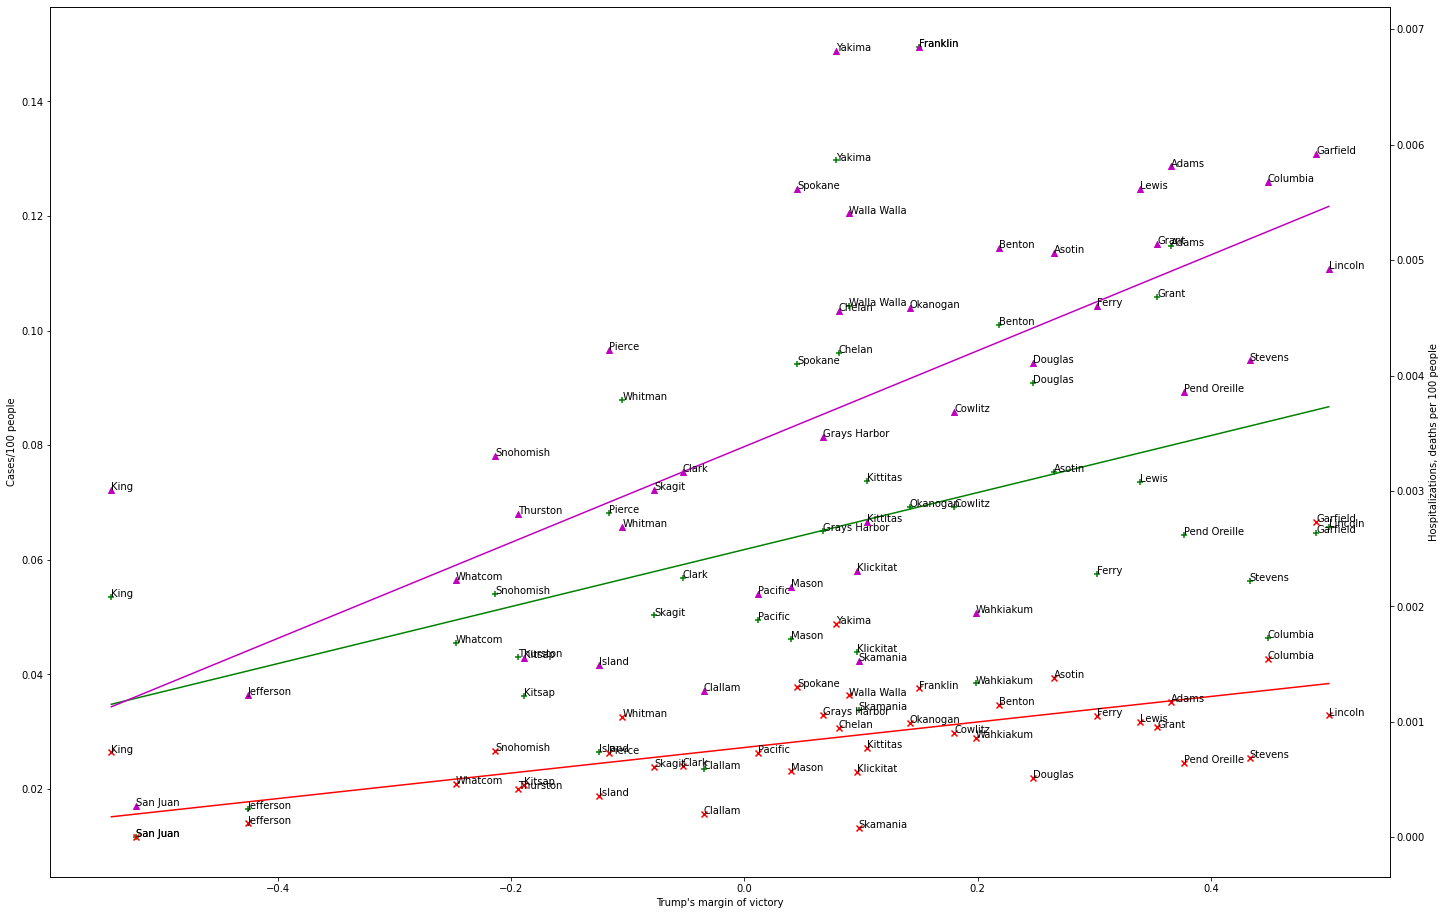

In [17]:
cases_color = 'g'
hospitalizations_color = 'm'
deaths_color = 'r'
fig = plt.figure(figsize=(24,16))
ax1 = fig.add_subplot(111)
ax1.scatter(x, cases, marker='+', color=cases_color)
ax1.set_xlabel("Trump's margin of victory")
ax1.set_ylabel("Cases/100 people")
for i in range(len(x)):
    point = (x[i], cases[i])
    ax1.annotate(names[i], point)
ax2 = ax1.twinx()
ax2.scatter(x, hospitalizations, marker="^", color=hospitalizations_color)
ax2.set_ylabel("Hospitalizations, deaths per 100 people")
for i in range(len(x)):
    point = (x[i], hospitalizations[i])
    ax2.annotate(names[i], point)
ax2.scatter(x, deaths, marker="x", color=deaths_color)
for i in range(len(x)):
    point = (x[i], deaths[i])
    ax2.annotate(names[i], point)

x_lin = list()                     # The starting and ending points of the linear fit
y_cases = list()
y_deaths = list()
y_hospitalizations = list()
x_lin.append( min(x) )
x_lin.append( max(x) )
m_cases, b_cases = np.polyfit(x, cases, 1)
m_deaths, b_deaths = np.polyfit(x, deaths, 1)
m_hospitalizations, b_hospitalizations = np.polyfit(x, hospitalizations, 1)
y_cases.append ( m_cases * x_lin[0] + b_cases )
y_cases.append ( m_cases * x_lin[1] + b_cases )
y_hospitalizations.append ( m_hospitalizations * x_lin[0] + b_hospitalizations )
y_hospitalizations.append ( m_hospitalizations * x_lin[1] + b_hospitalizations )
y_deaths.append ( m_deaths * x_lin[0] + b_deaths )
y_deaths.append ( m_deaths * x_lin[1] + b_deaths )
ax1.plot(x_lin, y_cases, color=cases_color)
ax2.plot(x_lin, y_hospitalizations, color=hospitalizations_color)
ax2.plot(x_lin, y_deaths, color=deaths_color)


plt.savefig("COVID-19_rates_as_a_function_of_Trumps_victory_in_2020.png")
plt.savefig("COVID-19_rates_as_a_function_of_Trumps_victory_in_2020.svg")
plt.show()

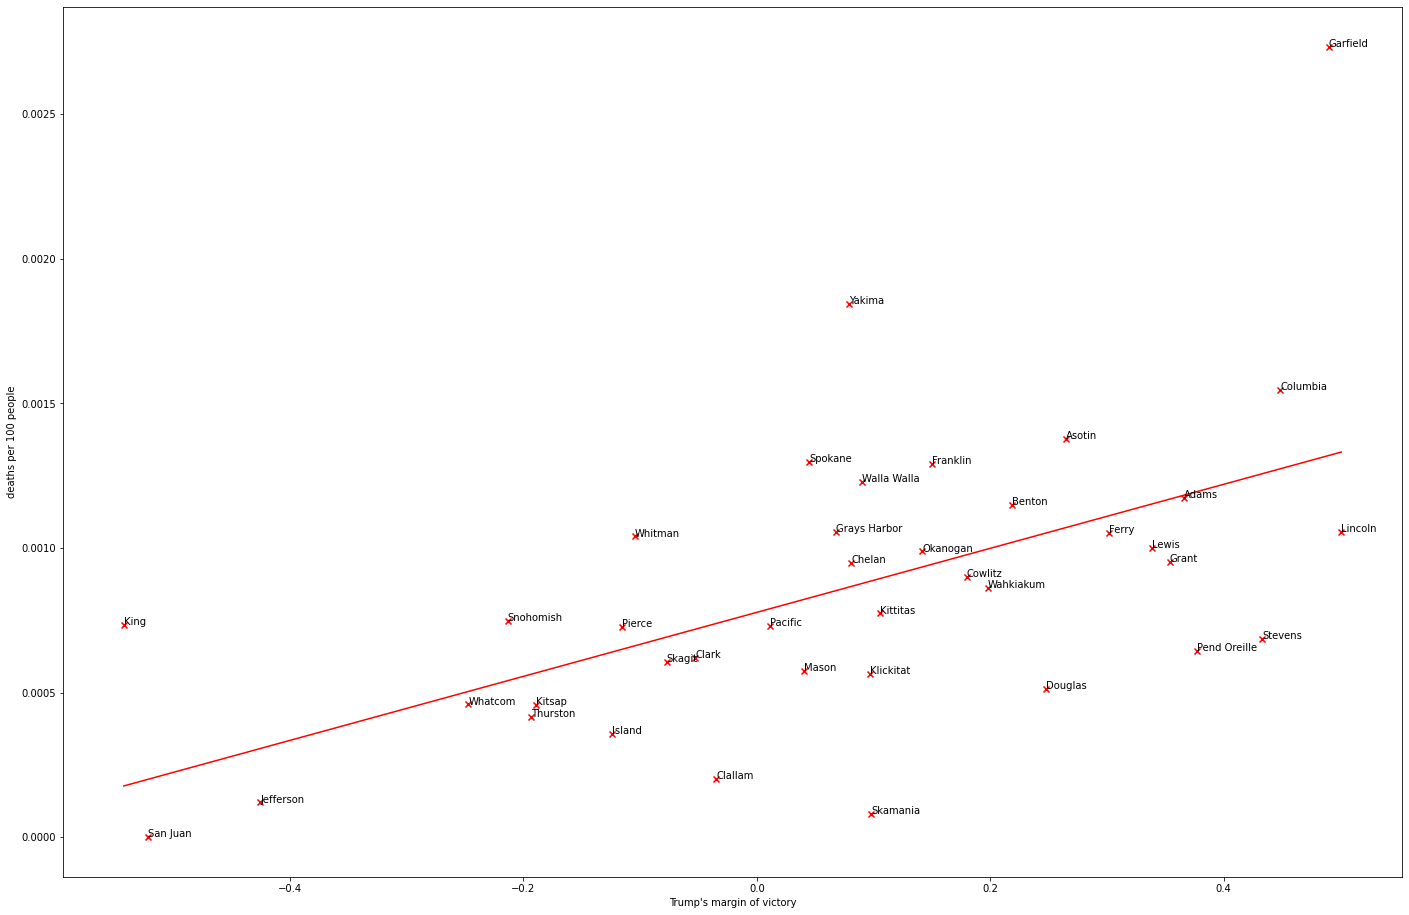

In [18]:
fig = plt.figure(figsize=(24,16))
ax = fig.add_subplot(111)
ax.set_ylabel("deaths per 100 people")
ax.set_xlabel("Trump's margin of victory")
for i in range(len(x)):
    point = (x[i], deaths[i])
    ax.annotate(names[i], point)
ax.scatter(x, deaths, marker="x", color=deaths_color)
ax.plot(x_lin, y_deaths, color=deaths_color)
plt.savefig("COVID-19_death_rates_as_a_function_of_Trumps_victory_in_2020.png")
plt.savefig("COVID-19_death_rates_as_a_function_of_Trumps_victory_in_2020.svg")
plt.show()

In [19]:
print(f"San Juan: Deaths: {county_dict['San Juan']['Deaths']} Population: {county_dict['San Juan']['pop2021']}")
print(f"Skamania: Deaths: {county_dict['Skamania']['Deaths']} Population: {county_dict['Skamania']['pop2021']}")

San Juan: Deaths: 0 Population: 18498
Skamania: Deaths: 1 Population: 12411


In [20]:
import datetime
print(datetime.datetime.now())

2021-09-12 22:21:39.034853
